In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(r):
    return r[0]**2+r[1]**2+r[2]**2+r[3]**2-1
G = (f,)

### Punto A

In [3]:
def GetVectorF(G,r):
    v = G[0](r)
    return np.array([v])

### Punto B

In [4]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return np.linalg.norm(v)

### Punto C

In [5]:
def GetJacobian(G,r,h=1e-6):
    dim = len(G)
    J = np.zeros((dim,4))
    
    for i in range(dim):
        for j in range(4):
            aux = np.zeros(4)
            aux[j] = h
            J[i,j] = (  G[i](r+aux) - G[i](r-aux) )/(2*h)
        
    return J.T

### Punto D

In [6]:
def Point(Min=-1,Max=1):
    p = [np.random.uniform(Min,Max),np.random.uniform(Min,Max),np.random.uniform(Min,Max),np.random.uniform(Min,Max)]
    return p


### Punto E

In [7]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e3),error=1e-5):
    
    d = 1
    it = 0
    Vector_F = np.array([])
    R_vector = np.array(r)
    
    while d > error and it < epochs:
        CurrentF = GetMetric(G,r)
        J = GetJacobian(G,r)
        GVector = GetVectorF(G,r)

        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        R_vector = np.vstack((R_vector,r))
        NewF = GetMetric(G,r)
        
        Vector_F = np.append(Vector_F,NewF)
        d = np.abs( CurrentF - NewF )/NewF
        it += 1
        
    if d < error:
        print(' Entrenamiento completo ', d, 'iteraciones', it)
        
    if it == epochs:
        print(' Entrenamiento no completado ')
        
    return r,it,Vector_F,R_vector

### Punto F

In [11]:
N = 1e3
points = np.zeros((int(N),4))

### Punto G

In [12]:
for i in range(int(N)):
    sol,it,vect,rvect=GetSolve(G,Point())
    points[i,0]= sol[0]
    points[i,1]= sol[1]
    points[i,2]= sol[2]
    points[i,3]= sol[3]

 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenamiento no completado 
 Entrenami

### Punto H

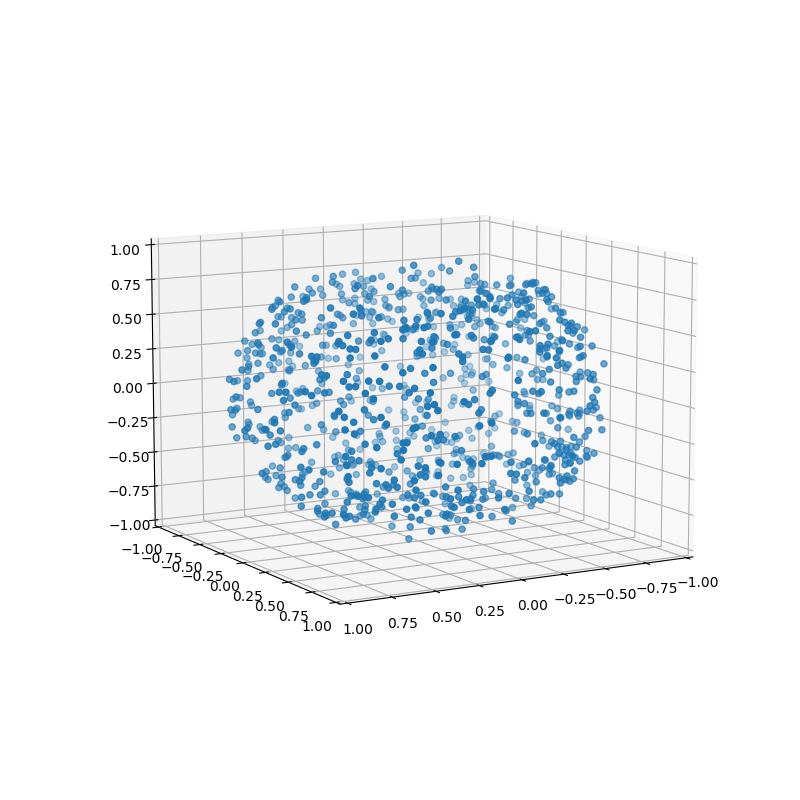

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection = '3d')

ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

ax.view_init(10, 60)
X=points[:,0]
Y=points[:,1]
Z=points[:,2]
ax.scatter(X,Y,Z)
plt.show()

La figura se asemeja a una esfera, demostrando así que el programa funciona